# Capstone Project - The Battle of Neighborhoods (Week 2)

# 1. Introduction

# 1.1 A description of the problem and a discussion of the background.

Singapore is a multi cultural country. It has a huge variety of different cuisine.
Queenstown district has many workplace and thus will definitely have lunch or dinner crowd
My friend would like to set up a food store in Singapore around the Queenstown district that is near to transportation mean.
I would like to help him to see what type of cuisine is limited or unavaliable in the district.
This would allow him to have choices to start his business with the data that is provided.

Information needed:
1. Singapore Map (Queenstown District)
2. Type of food in the area
3. Near to MRT

# 2 Data Required

# 2.1 Description of the data and its sources

Data will be collected from Foursquare and Wiki

1. Geographic location of Singapore and the District
2. Geographic location of Food in the district
3. Transport Data 

Python Lib will be used:
1. Pandas
2. Beautiful soup
3. Geocoder
4. Folium
5. matplotlib

Some data are self-made as unable to obtain online.
Data such as:
1. Rental pricing
2. Rental location
3. Rental Spaces


# 3 Methodology

After the processing of data we will see the data if it answered the following question
1. The different type of food
2. What MRT is near
3. Rental of the Area
4. Does distance to MRT affect the Rental 

## 3.1 Code Start

Importing of Libraries

In [1]:
import numpy as np 
import time
import pandas as pd 
import json 
import requests
from pandas.io.json import json_normalize
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
!conda install -c conda-forge folium=0.5.0 --yes
import folium
from folium import plugins
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from sklearn.cluster import KMeans

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



Queenstown, Singapore Geo Location

In [2]:
address = 'Queenstown, Singapore'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore home are {}, {}.'.format(latitude, longitude))

C:\Users\common\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


The geograpical coordinate of Singapore home are 1.2946235, 103.8060454.


In [3]:
neighborhood_latitude=1.2946235
neighborhood_longitude=103.8060454

Define Foursquare Credentials and Version

In [4]:
CLIENT_ID = 'SJ0EHYCTWMXKID3LIWN42KRAWHS1SJNZHVRR3KU2NQXQAMHY' # your Foursquare ID
CLIENT_SECRET = '2P1CP1CGYDAF1UU4OUJTYOD20D1NSPNCJE1R20CT2GUIQFDY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SJ0EHYCTWMXKID3LIWN42KRAWHS1SJNZHVRR3KU2NQXQAMHY
CLIENT_SECRET:2P1CP1CGYDAF1UU4OUJTYOD20D1NSPNCJE1R20CT2GUIQFDY


Getting data from foursquare

In [5]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=SJ0EHYCTWMXKID3LIWN42KRAWHS1SJNZHVRR3KU2NQXQAMHY&client_secret=2P1CP1CGYDAF1UU4OUJTYOD20D1NSPNCJE1R20CT2GUIQFDY&v=20180605&ll=1.2946235,103.8060454&radius=500&limit=100'

In [6]:
results = requests.get(url).json()

Getting the food type in the area

In [7]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Healing Touch,Spa,1.291318,103.807410
1,No Signboard Braised Duck Noodles,Chinese Restaurant,1.293188,103.802832
2,Queenstown MRT Station (EW19),Train Station,1.294407,103.806140
3,Ah Pang Steamboat & Seafood,Seafood Restaurant,1.293361,103.802559
4,Ristorante Takada,Italian Restaurant,1.291396,103.807794
5,新路 Fishball Noodle,Noodle House,1.293045,103.802903
6,Cafe Galilee,Café,1.298478,103.805211
7,Mei Ling Market & Food Centre,Food Court,1.293007,103.803042
8,Queenstown Stadium,Stadium,1.296276,103.802691
9,Queenstown Swimming Complex,Pool,1.296719,103.802467


In [12]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

14 venues were returned by Foursquare.


In [14]:
singaporemrt = 'mrt_stations.json'
sgmrt = pd.read_json(singaporemrt,
   convert_dates=True)
sgmrt.head()

,Possible Locations,Station,Station Name
0,[{'ADDRESS': '10 JURONG EAST STREET 12 JURONG ...,NS1,Jurong East
1,[{'ADDRESS': '10 BUKIT BATOK CENTRAL BUKIT BAT...,NS2,Bukit Batok
2,[{'ADDRESS': '802 BUKIT BATOK WEST AVENUE 5 BU...,NS3,Bukit Gombak
3,[{'ADDRESS': '10 CHOA CHU KANG AVENUE 4 CHOA C...,NS4,Choa Chu Kang
4,[{'ADDRESS': '61 CHOA CHU KANG DRIVE YEW TEE M...,NS5,Yew Tee


In [10]:
atitude=1.279925
longitude=103.847333
# create map of Singapore place  using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_sg)  
    
map_sg

In [37]:
rental = pd.read_csv(r"places.csv",encoding='latin-1')
rental.head()

,Address,Area,Price_per_ft2,Area-ft2,Rent_Price,Near_to_MRT
0,Alexandra Road,Queenstown,5,1000,5000.0,1
1,Commonwealth Avenue,Queenstown,6,1100,6600.0,2
2,Merino Crescent,Queenstown,7,1000,7000.0,3
3,Commonwealth,Queenstown,9,1200,10800.0,4
4,Ghim Moh,Queenstown,11,1200,13200.0,5


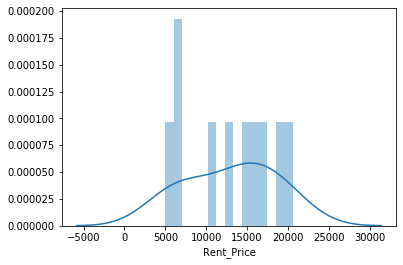

In [38]:
import seaborn as sns
sns.distplot(rental['Rent_Price'],bins=15)

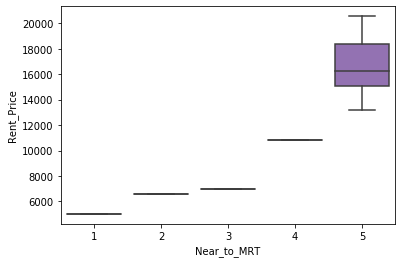

In [39]:
sns.boxplot(x='Near_to_MRT', y= 'Rent_Price', data=rental)

# 4. Result

After gathering of datas in regard to the location of Queenstown, we can see that the pricing of the rental is affected by the MRT distance. The distance closer to MRT the more expensive it appears to be. The variety of food that it offered in the area were limited thus i would recommand my friend to open a food store which serve cuisine such as Japanese cuisine or French Cuisine.

# 5.0 Discussion

I would like to say that i had learned substantial information regarding to data analysis through the courses by IBM. 
The whole project and other smaller assignment gave me rough guide and knowledge regarding to this field
I feel with this course, it gave me a good start on this field.
I would continued to learn and explore from more courses that is avaliable in the net

# 6.0 Conclusion

 I am glad to be part of the course and would recommand others that want to pursue this field to try out this course.
 The project and assignment allows me to stop and test myself. Thank you.